# Guided Project Unsupervised Learning

# The bread Basket bakery

Edinburgh,uk

In [145]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [146]:
df=pd.read_csv('BreadBasket_DMS.csv')
df.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [147]:
df.describe()

,Transaction
count,21293.000000
mean,4951.990889
std,2787.758400
min,1.000000
25%,2548.000000
50%,5067.000000
75%,7329.000000
max,9684.000000


In [148]:
df['DateTime']=pd.to_datetime(df.Date+' '+df.Time)
df.head()

,Date,Time,Transaction,Item,DateTime
0,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34
2,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34
3,2016-10-30,10:07:57,3,Hot chocolate,2016-10-30 10:07:57
4,2016-10-30,10:07:57,3,Jam,2016-10-30 10:07:57


In [149]:
df.Item.nunique()

95

In [150]:
df.Item.value_counts()

Coffee                           5471
Bread                            3325
Tea                              1435
Cake                             1025
Pastry                            856
NONE                              786
Sandwich                          771
Medialuna                         616
Hot chocolate                     590
Cookies                           540
Brownie                           379
Farm House                        374
Muffin                            370
Juice                             369
Alfajores                         369
Soup                              342
Scone                             327
Toast                             318
Scandinavian                      277
Truffles                          193
Coke                              185
Spanish Brunch                    172
Fudge                             159
Baguette                          152
Jam                               149
Tiffin                            146
Mineral wate

In [151]:
df.Item.unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'NONE',
       'Tartine', 'Basket', 'Mineral water', 'Farm House', 'Fudge',
       'Juice', "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pi

In [152]:
beverage = ['Hot chocolate', 'Coffee', 'Tea', 'Mineral water', 'Juice', 'Coke', 'Smoothies']
other = ['NONE', 'Christmas common', 'Gift voucher', "Valentine's card", 'Tshirt', 'Afternoon with the baker', 'Postcard', 'Siblings', 'Nomad bag', 'Adjustment', 'Drinking chocolate spoons ', 'Coffee granules ']
kids = ["Ella's Kitchen Pouches", 'My-5 Fruit Shoot', 'Kids biscuit']
snacks = ['Mighty Protein', 'Pick and Mix Bowls', 'Caramel bites', 'Bare Popcorn', 'Crisps', 'Cherry me Dried fruit', 'Raw bars']
bread = ['Bread', 'Toast', 'Baguette', 'Focaccia', 'Scandinavian']
breakfast_pastry = ['Muffin', 'Pastry', 'Medialuna', 'Scone']
dessert = ['Cookies', 'Tartine', 'Fudge', 'Victorian Sponge', 'Cake', 'Alfajores', 'Brownie', 'Bread Pudding', 'Bakewell', 'Raspberry shortbread sandwich', 'Lemon and coconut', 'Crepes', 'Chocolates', 'Truffles', 'Panatone']
condiments = ['Jam', 'Dulce de Leche', 'Honey', 'Gingerbread syrup', 'Extra Salami or Feta', 'Bacon', 'Spread', 'Chimichurri Oil']
breakfast = ['Eggs', 'Frittata', 'Granola', 'Muesli', 'Duck egg', 'Brioche and salami']
lunch = ['Soup', 'Sandwich', 'Chicken sand', 'Salad', 'Chicken Stew']
other_food = [x for x in df.Item.unique() if x not in beverage 
                and x not in other and x not in kids and x not in snacks 
                and x not in bread and x not in breakfast_pastry 
                and x not in dessert and x not in condiments 
                and x not in breakfast and x not in lunch]

In [153]:
lst_cat={'beverage': beverage,'other': other,'kids':kids,'snacks':snacks,'bread':bread,'breakfast_pastry':breakfast_pastry,'dessert': dessert,'condiments': condiments,'breakfast':breakfast,'lunch':lunch,'other_food':other_food}




## Dummies 

1. Replace in the original columns and get_dummies
2. Create columns directly

In [154]:
for i,j in lst_cat.items():
    df[i] = np.where(df.Item.isin(j),1,0)

In [155]:
df.head()

,Date,Time,Transaction,Item,DateTime,beverage,other,kids,snacks,bread,breakfast_pastry,dessert,condiments,breakfast,lunch,other_food
0,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11,0,0,0,0,1,0,0,0,0,0,0
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,0,0,0,0,1,0,0,0,0,0,0
2,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,0,0,0,0,1,0,0,0,0,0,0
3,2016-10-30,10:07:57,3,Hot chocolate,2016-10-30 10:07:57,1,0,0,0,0,0,0,0,0,0,0
4,2016-10-30,10:07:57,3,Jam,2016-10-30 10:07:57,0,0,0,0,0,0,0,1,0,0,0


In [156]:
lst_cat.items()

dict_items([('beverage', ['Hot chocolate', 'Coffee', 'Tea', 'Mineral water', 'Juice', 'Coke', 'Smoothies']), ('other', ['NONE', 'Christmas common', 'Gift voucher', "Valentine's card", 'Tshirt', 'Afternoon with the baker', 'Postcard', 'Siblings', 'Nomad bag', 'Adjustment', 'Drinking chocolate spoons ', 'Coffee granules ']), ('kids', ["Ella's Kitchen Pouches", 'My-5 Fruit Shoot', 'Kids biscuit']), ('snacks', ['Mighty Protein', 'Pick and Mix Bowls', 'Caramel bites', 'Bare Popcorn', 'Crisps', 'Cherry me Dried fruit', 'Raw bars']), ('bread', ['Bread', 'Toast', 'Baguette', 'Focaccia', 'Scandinavian']), ('breakfast_pastry', ['Muffin', 'Pastry', 'Medialuna', 'Scone']), ('dessert', ['Cookies', 'Tartine', 'Fudge', 'Victorian Sponge', 'Cake', 'Alfajores', 'Brownie', 'Bread Pudding', 'Bakewell', 'Raspberry shortbread sandwich', 'Lemon and coconut', 'Crepes', 'Chocolates', 'Truffles', 'Panatone']), ('condiments', ['Jam', 'Dulce de Leche', 'Honey', 'Gingerbread syrup', 'Extra Salami or Feta', 'Bacon

# Processing Data 

In [157]:
df_grouped= df.groupby(['Transaction','DateTime']).sum()
df_grouped.shape

(9531, 11)

In [158]:
df_grouped.reset_index(level=['DateTime'], inplace=True)

In [159]:
df_grouped['hour']=df_grouped.DateTime.dt.hour
df_grouped['day']=df_grouped.DateTime.dt.day_name()

In [160]:
df_grouped.day.value_counts()

Saturday     2068
Friday       1488
Sunday       1264
Thursday     1252
Tuesday      1203
Monday       1135
Wednesday    1121
Name: day, dtype: int64

In [161]:
df_grouped.hour.value_counts()

11    1445
12    1347
10    1267
13    1163
14    1130
9     1007
15     924
16     583
8      375
17     160
18      52
19      34
7       16
20      15
22       7
23       3
21       2
1        1
Name: hour, dtype: int64

In [162]:
df_grouped=pd.get_dummies(data=df_grouped,columns=['day'])

In [163]:
df_grouped.drop('DateTime',inplace=True,axis=1)

In [164]:
df_grouped.head()

,beverage,other,kids,snacks,bread,breakfast_pastry,dessert,condiments,breakfast,lunch,other_food,hour,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
Transaction,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,0,0,0,0,0,9,0,0,0,1,0,0,0
2,0,0,0,0,2,0,0,0,0,0,0,10,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,1,0,0,0,10,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,10,0,0,0,1,0,0,0
5,1,0,0,0,1,1,0,0,0,0,0,10,0,0,0,1,0,0,0


In [165]:
df_grouped['is_weekend']= np.where(df_grouped['day_Saturday']+df_grouped['day_Sunday']>0,1,0)

In [166]:
df_grouped.columns

Index(['beverage', 'other', 'kids', 'snacks', 'bread', 'breakfast_pastry',
       'dessert', 'condiments', 'breakfast', 'lunch', 'other_food', 'hour',
       'day_Friday', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'is_weekend'],
      dtype='object')

In [167]:
df_grouped.drop(df_grouped.columns[-2:],axis=1,inplace=True)

In [168]:
df_grouped.shape

(9531, 18)

In [169]:
df_grouped.head()


,beverage,other,kids,snacks,bread,breakfast_pastry,dessert,condiments,breakfast,lunch,other_food,hour,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday
Transaction,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,0,0,0,0,0,9,0,0,0,1,0,0
2,0,0,0,0,2,0,0,0,0,0,0,10,0,0,0,1,0,0
3,1,0,0,0,0,0,1,1,0,0,0,10,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,0,0,10,0,0,0,1,0,0
5,1,0,0,0,1,1,0,0,0,0,0,10,0,0,0,1,0,0


In [170]:
from sklearn.decomposition import PCA

pca=PCA(4)

In [171]:
pc=pca.fit_transform(df_grouped)
ppc=pd.DataFrame(data=pc, columns=['pc1','pc2','pc3','pc4' ])
ppc.head()

,pc1,pc2,pc3,pc4
0,3.197278,-0.926494,0.245139,0.004742
1,2.227759,-1.274171,1.183287,-0.162406
2,2.107511,0.425073,-0.217870,0.879323
3,2.198823,-0.580476,-0.782893,-0.031648
4,2.206675,0.037580,0.443637,-0.336720


In [172]:
pca.explained_variance_ratio_

array([0.67803564, 0.08888644, 0.03439925, 0.03402446])

In [173]:
from sklearn.cluster import KMeans

kmeans=KMeans(5)
df_cluster=kmeans.fit(ppc)
df_cluster.cluster_centers_

array([[-1.39862674,  0.12027355, -0.07937924,  0.0078388 ],
       [ 2.92436537, -0.15206538, -0.01959789,  0.00830414],
       [-3.60460912, -0.01926484,  0.03545971,  0.00544676],
       [ 0.41593375, -0.82936948,  0.12152216,  0.04161688],
       [ 0.91403079,  0.76681629, -0.01707619, -0.05984998]])

In [174]:
df_grouped['labels']=df_cluster.fit_predict(ppc)
df_grouped.labels.value_counts()

1    2375
3    2110
4    1923
2    1780
0    1343
Name: labels, dtype: int64

In [175]:
df_grouped.reset_index('Transaction', inplace=True)

In [176]:
df_merged=pd.merge(df,df_grouped[['Transaction','labels']],on='Transaction',how='outer') # join everything with everything


In [177]:
df_merged.labels.value_counts()

3    5220
1    4440
0    4226
2    4041
4    3366
Name: labels, dtype: int64

In [178]:
pd.crosstab(df_grouped.hour,df_grouped.labels)

labels,0,1,2,3,4
hour,,,,,
1,0,1,0,0,0
7,0,16,0,0,0
8,0,375,0,0,0
9,20,987,0,0,0
10,271,996,0,0,0
11,780,0,0,0,665
12,267,0,0,0,1080
13,5,0,0,980,178
14,0,0,0,1130,0


In [179]:
df_merged['day']=df_merged.DateTime.dt.day_name()

In [180]:
pd.crosstab(df_merged.day,df_merged.labels).apply(lambda r:round(r/r.sum(),2),axis=0)

labels,0,1,2,3,4
day,,,,,
Friday,0.13,0.17,0.15,0.15,0.16
Monday,0.11,0.11,0.11,0.11,0.11
Saturday,0.23,0.25,0.23,0.21,0.21
Sunday,0.20,0.10,0.11,0.17,0.17
Thursday,0.12,0.14,0.13,0.13,0.12
Tuesday,0.10,0.11,0.13,0.12,0.13
Wednesday,0.10,0.11,0.14,0.11,0.11


In [181]:
import seaborn as sns

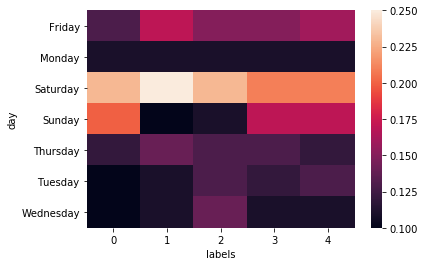

In [182]:
sns.heatmap(pd.crosstab(df_merged.day,df_merged.labels).apply(lambda r:round(r/r.sum(),2),axis=0))

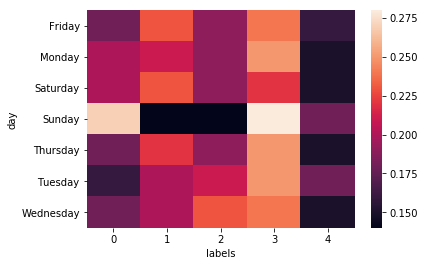

In [183]:
sns.heatmap(pd.crosstab(df_merged.day,df_merged.labels).apply(lambda r:round(r/r.sum(),2),axis=1))

In [184]:
a=df_merged.groupby('labels').Item.value_counts()


In [185]:
b=a.to_frame('counts').reset_index()

In [186]:
b.set_index('Item',inplace=True)

In [187]:
b.groupby('labels').counts.nlargest(5)

labels  Item         
0       Coffee           1681
        Tea               333
        Pastry            189
        Bread             187
        Hot chocolate     186
1       Coffee           1168
        Bread            1028
        Pastry            391
        Medialuna         261
        Tea               199
2       Coffee            927
        Bread             560
        Tea               382
        Cake              328
        Hot chocolate     183
3       Coffee           1232
        Bread             520
        Tea               411
        Sandwich          397
        Cake              306
4       Bread            1030
        Coffee            463
        NONE              157
        Sandwich          132
        Pastry            127
Name: counts, dtype: int64

# DBSCAN

In [188]:
from sklearn.datasets import make_moons

/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [196]:
moons= make_moons(100,shuffle=True,noise=0.05)

(array([15.,  8.,  8.,  8., 11., 10., 10.,  9.,  9., 12.]),
 array([-0.55977094, -0.39639081, -0.23301068, -0.06963054,  0.09374959,
         0.25712972,  0.42050985,  0.58388999,  0.74727012,  0.91065025,
         1.07403038]),
 <a list of 10 Patch objects>)

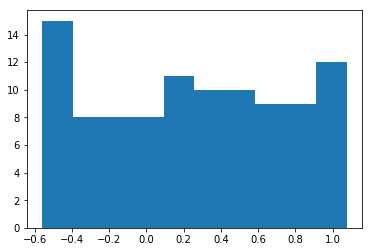

In [197]:
plt.hist(moons[0][:,1])

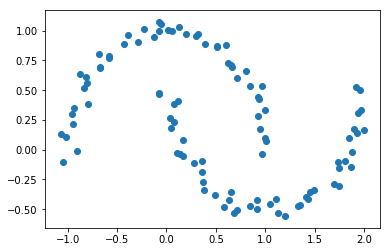

In [198]:
plt.scatter(moons[0][:,0],moons[0][:,1])

In [199]:
from sklearn.cluster import DBSCAN

In [200]:
dbscan=DBSCAN(eps=0.3).fit(moons[0])
dbscan.labels_

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1])

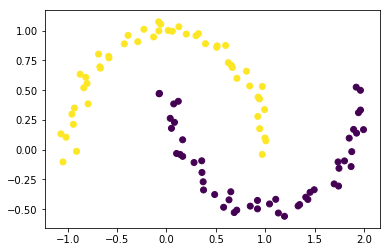

In [201]:
plt.scatter(moons[0][:,0],moons[0][:,1], c=dbscan.labels_)

# GMM

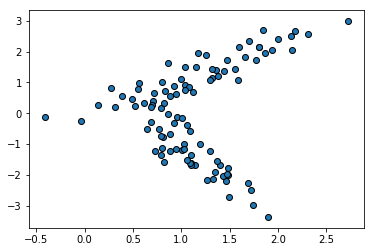

In [210]:
from sklearn.datasets import make_classification
from sklearn import mixture

X=make_classification(n_features=2,n_redundant=0,n_informative=2, n_clusters_per_class=1)
plt.scatter(X[0][:,0],X[0][:,1],marker='o',edgecolor='k')


In [211]:
?make_classification

In [214]:
gmm=mixture.GaussianMixture(3,covariance_type='full').fit(X[0])

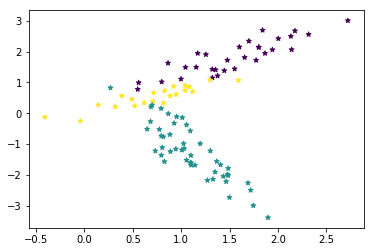

In [215]:
plt.scatter(X[0][:,0],X[0][:,1],marker='*',s=25,c=gmm.predict(X[0]))